<a href="https://colab.research.google.com/github/Samson871/Petrol_Price_Pridiction/blob/main/Notebook/Petrol_Price_Pridiction_iNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries for data analysis and machine learning



In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the training and testing datasets and perform initial data exploration
# Load the datasets

In [143]:
df = pd.read_csv('/content/train_data.csv')
Test_DF = pd.read_csv('/content/test_data.csv')

In [144]:
df

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [145]:
df.describe()


,Petrol (USD)
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [146]:
df.isnull().sum()

,0
Date,0
Petrol (USD),2


# Cleaning  and preprocessing the data

In [147]:
# Drop rows with null values in 'Petrol (USD)'
df = df.dropna(subset=['Petrol (USD)'])

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# Rename column for consistency
df.rename(columns={'Petrol (USD)': 'Price'}, inplace=True)

<ipython-input-147-a44875b1f173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-147-a44875b1f173>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', inplace=True)
<ipython-input-147-a44875b1f173>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Petrol (USD)': 'Price'}, inplace=Tru

# Feature Engineering: Extract features from the 'Date' column

<ipython-input-148-2ed5b6af801a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-148-2ed5b6af801a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-148-2ed5b6af801a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

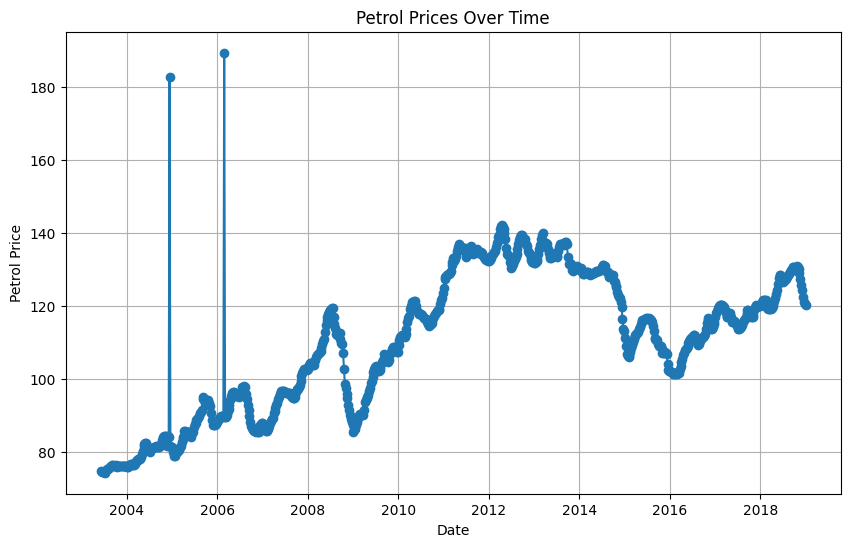

In [148]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define the target and features
y = df['Price']
X = df[['Year', 'Month', 'Day']]

# Plot Data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.grid(True)
plt.show()

#plot graph to check outliers

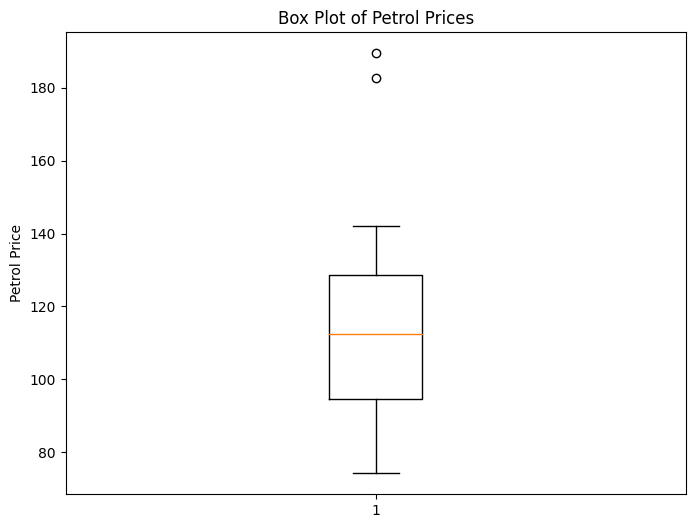

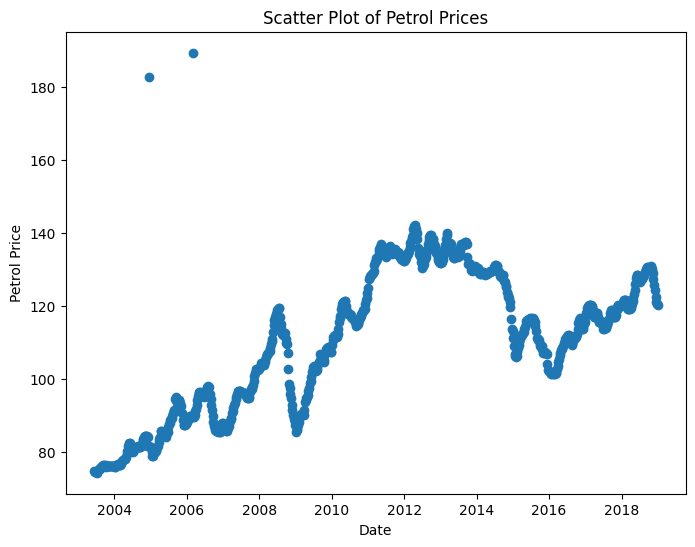

In [149]:


# Box plot for outlier detection
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Petrol Prices')
plt.ylabel('Petrol Price')
plt.show()

# Scatter plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.scatter(df['Date'], df['Price'])
plt.title('Scatter Plot of Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.show()



# Remove outliers using IQR method

In [150]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f"Number of outliers removed: {len(outliers)}")

Number of outliers removed: 2


# plot graph to see outlier for df_no_outliers

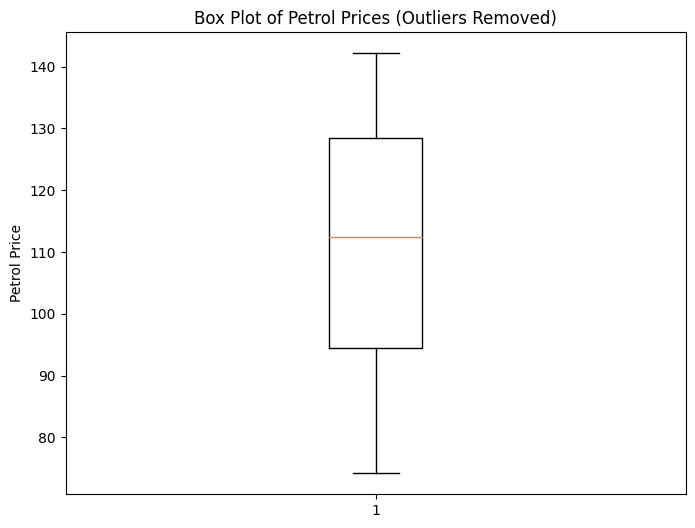

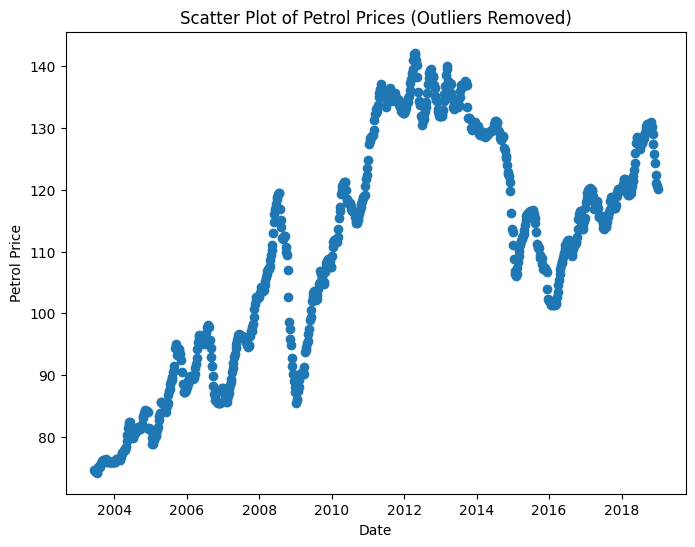

In [151]:


import matplotlib.pyplot as plt

# Box plot for outlier detection after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['Price'])
plt.title('Box Plot of Petrol Prices (Outliers Removed)')
plt.ylabel('Petrol Price')
plt.show()

# Scatter plot to visualize potential outliers after removing outliers
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['Date'], df_no_outliers['Price'])
plt.title('Scatter Plot of Petrol Prices (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.show()

In [152]:
df_no_outliers.shape

(809, 5)

In [153]:
Test_DF

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN
5,1/6/2019,NaN
6,1/7/2019,NaN
7,1/8/2019,NaN
8,1/9/2019,NaN
9,1/10/2019,NaN


In [154]:
Test_DF.isnull().sum()

,0
Date,0
Prediction,16


In [155]:
Test_DF.describe()

,Prediction
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


# Define target and features for the dataframe without outliers


In [156]:
y = df_no_outliers['Price']
X = df_no_outliers[['Year', 'Month', 'Day']]

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the validation set
preds = model.predict(X_valid)

# Evaluate the model
r_squared = r2_score(y_valid, preds)
print(f"R-squared: {r_squared:.2f}")

score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

# Calculate the accuracy score
accuracy = model.score(X_valid, y_valid)
print(f"Model accuracy: {accuracy * 100:.2f}%")

R-squared: 1.00
MAE: 0.9558833333333119
Model accuracy: 99.60%


In [157]:
y_valid

,Price
616,112.06
206,95.71
55,80.41
482,138.03
27,75.96
...,...
620,113.55
71,83.35
49,81.49
420,134.86


# Load the sample submission file into a DataFrame.

In [158]:

sample_sub = pd.read_csv('/content/sample_submission.csv')

# Create the submission file
submission = sample_sub.copy()
submission['Prediction'] = preds_test
submission.to_csv('submission.csv', index=False)
print('Submission file created.')

Submission file created.


In [159]:
submission.head(15)

,Date,Prediction
0,1/1/2019,120.564400
1,1/2/2019,120.540667
2,1/3/2019,120.540667
3,1/4/2019,120.919800
4,1/5/2019,120.919800
5,1/6/2019,120.919800
6,1/7/2019,121.055600
7,1/8/2019,121.073500
8,1/9/2019,121.142867
9,1/10/2019,121.142867
